In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

## Useful functions to be used throughout the code

In [21]:
def read_csv(file_name):
    df = pd.read_csv(f"Artista_data/{file_name}.csv", index_col=0)
    #df['release_date'] = df['release_date'].apply(lambda f: datetime.strptime(f, '%Y-%m-%d'))
    return df

In [25]:
def get_correlation_matrix(df):
    #filter df to only use qunatitative columns
    df = df[['track_number', 'acousticness', 'danceability', 'energy', 'instrumentalness',
       'liveness', 'loudness', 'speechiness', 'tempo', 'valence', 'popularity',
       'duration_ms']]
    corr_df = df.corr()[['popularity']]
    corr_df.index = ['Track number', 'Acousticness', 'Danceability', 'Energy', 'Instrumentalness', 'Liveness', 'Loudness', 'Speechiness', 'Tempo', 'Valence', 'Popularity', 'Duration (ms)']
    return corr_df[~corr_df.index.isin(['Popularity'])]

In [6]:
def combine_correlation_matrices(dfs, columns):
    corrs = None
    for df in dfs:
        corr_df = get_correlation_matrix(df)
        if corrs is None:
            corrs = corr_df
        else:
            corrs = pd.concat([corrs, corr_df], axis=1)
    corrs.columns = columns
    return corrs

In [7]:
def print_correlation_heatmap(df):
    sns.heatmap(df, vmin=-1, vmax=1, cmap='coolwarm')

In [22]:
taylor_swift_df = read_csv('taylor_swift_spotify')
ed_sheeran_df = read_csv('ed_sheeran_spotify')
beatles_df = read_csv('beatles_spotify')
elton_john_df = read_csv('elton_john_spotify')
metallica_df = read_csv('metallica_spotify')
rolling_stones_df = read_csv('rolling_stones_spotify')
tame_impala_df = read_csv('tame_impala_spotify')

In [23]:
combined_df = pd.concat([taylor_swift_df, ed_sheeran_df, beatles_df, elton_john_df, metallica_df, rolling_stones_df, tame_impala_df])
combined_df = combined_df.reset_index()
combined_df.drop('index', axis=1, inplace=True)

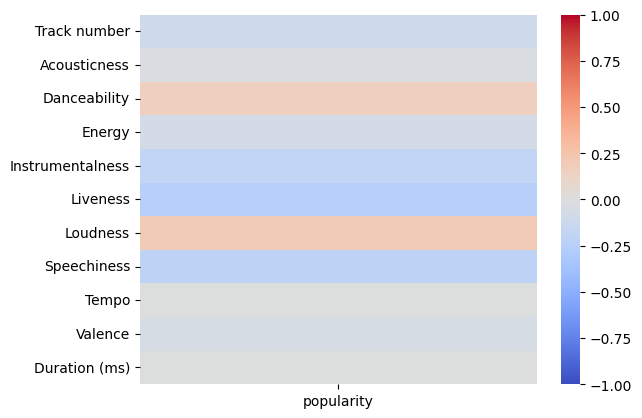

In [26]:
print_correlation_heatmap(get_correlation_matrix(combined_df))

In [27]:
artists = ["Beatles", "Rolling Stones", "Elton John", "Metallica", "Taylor Swift", "Tame Impala", "Ed Sheeran"]

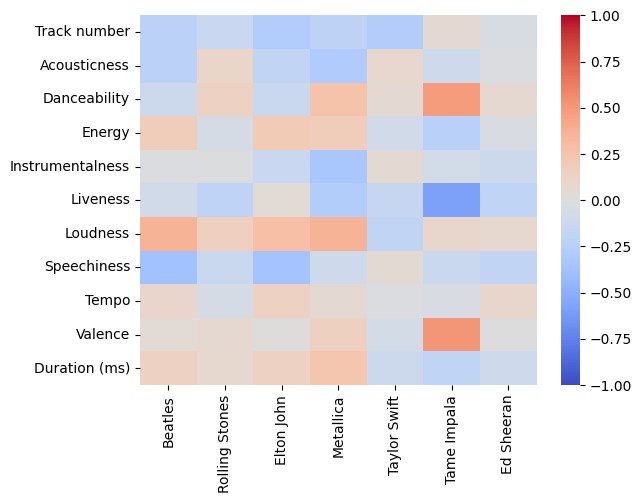

In [28]:
corrs = combine_correlation_matrices([beatles_df, rolling_stones_df, elton_john_df, metallica_df, taylor_swift_df, tame_impala_df, ed_sheeran_df], artists)
print_correlation_heatmap(corrs)